<h1>   </h1>


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h2>1. Bring a dataset relevant to the project idea domain :</h2>

In [137]:
# df=pd.read_csv('Data/Updated_Data_with_Interview_Performance_new.csv')
df=pd.read_csv('Data/Updated_Data_with_Interview_Performance.csv')
# df=pd.read_csv('Data/job_dataset_new.csv')
df.head()

,user_id,qualifications,experience_years,course_grades,projects_completed,extracurriculars,is_suitable,interview_performance
0,1,Python;Data Analysis;SQL,3,75.26,9,0,1,3.546858
1,2,Java,4,74.25,6,2,1,3.852611
2,3,Data Analysis,2,74.89,4,3,0,2.726408
3,4,Data Analysis,4,72.73,2,3,1,3.123988
4,5,Machine Learning;Python;C++,4,84.85,1,4,0,2.899003


<h2>2. Perform data preprocessing on the dataset :</h2>

In [139]:
# Drop unimportant columns
df.drop('user_id',axis='columns',inplace=True)

KeyError: "['user_id'] not found in axis"

In [140]:
# Encode Categorical Data (qualifications column)
from sklearn.preprocessing import MultiLabelBinarizer

df['qualifications_split'] = df['qualifications'].apply(lambda x: x.split(';'))
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(df['qualifications_split']), columns=mlb.classes_)

# Concatenate back to original dataframe
df = pd.concat([df, skills_encoded], axis=1).drop(['qualifications', 'qualifications_split'], axis=1)
df.head()


,experience_years,course_grades,projects_completed,extracurriculars,is_suitable,interview_performance,C++,Data Analysis,Java,Machine Learning,Python,SQL
0,3,75.26,9,0,1,3.546858,0,1,0,0,1,1
1,4,74.25,6,2,1,3.852611,0,0,1,0,0,0
2,2,74.89,4,3,0,2.726408,0,1,0,0,0,0
3,4,72.73,2,3,1,3.123988,0,1,0,0,0,0
4,4,84.85,1,4,0,2.899003,1,0,0,1,1,0


In [141]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
numerical_features = ['experience_years','course_grades','projects_completed' ,'extracurriculars', 'interview_performance']
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,experience_years,course_grades,projects_completed,extracurriculars,is_suitable,interview_performance,C++,Data Analysis,Java,Machine Learning,Python,SQL
0,0.6,0.38150,1.000000,0.00,1,0.668961,0,1,0,0,1,1
1,0.8,0.35625,0.666667,0.50,1,0.738614,0,0,1,0,0,0
2,0.4,0.37225,0.444444,0.75,0,0.482054,0,1,0,0,0,0
3,0.8,0.31825,0.222222,0.75,1,0.572627,0,1,0,0,0,0
4,0.8,0.62125,0.111111,1.00,0,0.521373,1,0,0,1,1,0


In [142]:
# Splitting the data
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('is_suitable', axis=1)
y = df['is_suitable']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

<h2>3. Train your neural network model :</h2>

In [154]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(11,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\Abdelrahman Mostafa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5127 - loss: 0.7015
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5619 - loss: 0.6847
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6182 - loss: 0.6732
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6907 - loss: 0.6596
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7582 - loss: 0.6387
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8026 - loss: 0.6107
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8358 - loss: 0.5764
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8540 - loss: 0.5393
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8696 - loss: 0.4980
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8691 - loss: 0.4585
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8654 - loss: 0.4268
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

<h2>4. Apply modifications to the model (Deal with Weight Initialization) :</h2>

In [144]:
from tensorflow.keras.initializers import HeNormal, GlorotNormal
input_shape = (X_train.shape[1],)
model = keras.Sequential([
        # Input layer
        keras.layers.Dense(64,
                    input_shape=input_shape,
                    kernel_initializer=HeNormal(seed=42),
                    activation='relu',
                    name='input_layer'),

        # Hidden layers with He initialization (good for ReLU)
        keras.layers.Dense(32,
                    kernel_initializer=HeNormal(seed=42),
                    activation='relu',
                    name='hidden_layer_1'),

        keras.layers.Dropout(0.3),  # Prevent overfitting

        keras.layers.Dense(16,
                    kernel_initializer=HeNormal(seed=42),
                    activation='relu',
                    name='hidden_layer_2'),

        # Output layer with Glorot/Xavier initialization (good for sigmoid)
        keras.layers.Dense(1,
                    kernel_initializer=GlorotNormal(seed=42),
                    activation='sigmoid',
                    name='output_layer')
    ])
# Compile with better learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Train the model with validation split
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
)

Epoch 1/100


C:\Users\Abdelrahman Mostafa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5108 - loss: 0.7020 - val_accuracy: 0.5628 - val_loss: 0.6843
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5698 - loss: 0.6779 - val_accuracy: 0.6944 - val_loss: 0.6224
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6960 - loss: 0.5767 - val_accuracy: 0.8612 - val_loss: 0.3597
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.3865 - val_accuracy: 0.8637 - val_loss: 0.2803
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8496 - loss: 0.3275 - val_accuracy: 0.8659 - val_loss: 0.2643
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8588 - loss: 0.3061 - val_accuracy: 0.8669 - val_loss: 0.2625
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8589 - loss: 0.2956 - val_accuracy: 0.8678 - val_loss: 0.2526
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.2807 - val_accuracy: 0.8678

<h2>5. Evaluate your model on testing dataset :</h2>

In [145]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8757 - loss: 0.2170

Test accuracy: 0.8763


<h2>6. Use the model to make predictions on unseen examples :</h2>

In [146]:
yp = model.predict(X_test)
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


[1, 1, 1, 1, 1, 1, 1, 0, 0, 1]

In [147]:
y_test[:10]

14456    1
5536     0
4029     1
128      1
14309    1
7954     1
3468     1
1341     0
6308     0
6586     1
Name: is_suitable, dtype: int64

In [148]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2029
           1       0.88      0.86      0.87      1971

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



Text(95.72222222222221, 0.5, 'Truth')

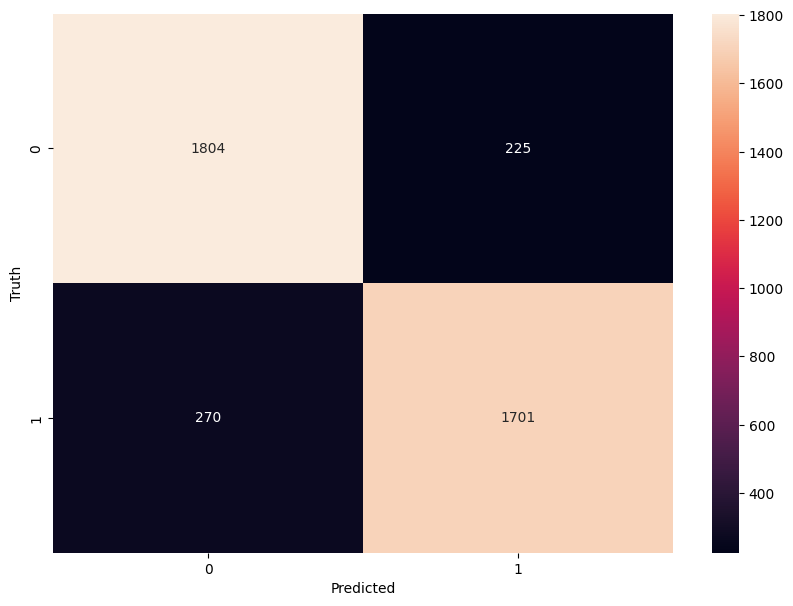

In [149]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2>7. Do Feature Importance on your model :</h2>

In [150]:
# Get the weights of the model
model_weights = model.get_weights()

# Get the input layer weights

input_layer_weights = model_weights[0]

# Get the feature names
feature_names = X.columns

# Create a dataframe with feature names and weights
feature_weights = pd.DataFrame(list(zip(feature_names, input_layer_weights.flatten())), columns=['feature', 'weight'])
feature_weights = feature_weights.sort_values(by='weight', ascending=False)
feature_weights

,feature,weight
9,Python,0.562529
5,C++,0.516474
0,experience_years,0.291085
3,extracurriculars,0.277461
10,SQL,0.242732
4,interview_performance,0.166115
8,Machine Learning,0.128121
6,Data Analysis,-0.042644
2,projects_completed,-0.087833
7,Java,-0.188536


<h2>8. Perform hyperparameter tuning and provide an explanation of the new results :</h2>

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Define the model creation function
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Adjust based on your task
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Use the function to create the KerasClassifier
model2 = KerasClassifier(
    model=create_model,  # Pass the callable
    batch_size=32,
    epochs=100,
)

# Define the grid search parameters
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150]
}

# Create the grid search
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Mean: {mean}, Stdev: {stdev} with: {param}")

C:\Users\Abdelrahman Mostafa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.8744375615151987 using {'batch_size': 16, 'epochs': 50}
Mean: 0.8744375615151987, Stdev: 0.004041051592483478 with: {'batch_size': 16, 'epochs': 50}
Mean: 0.8714374911836563, Stdev: 0.00214575707981865 with: {'batch_size': 16, 'epochs': 100}
Mean: 0.8709374482136855, Stdev: 0.004554372342972064 with: {'batch_size': 16, 'epochs': 150}
Mean: 0.8718124911865859, Stdev: 0.0038288655354584474 with: {'batch_size': 32, 'epochs': 50}
Mean: 0.8700000653865388, Stdev: 0.004124111185723991 with: {'batch_size': 32, 'epochs': 100}
Mean: 0.8712501552344397, Stdev: 0.0017827706867942074 with: {'batch_size': 32, 'epochs': 150}
Mean: 0.8703749130552381, Stdev: 0.006202603491121179 with: {'batch_size': 64, 'epochs': 50}
Mean: 0.8703750653894683, Stdev: 0.002340010805265459 with: {'batch_size': 64, 'epochs': 100}
Mean: 0.8691873271138314, Stdev: 0.003763389683223944 with: {'batch_size': 64, 'epochs': 150}


<h2>9. Visualize weights and biases after training :</h2>

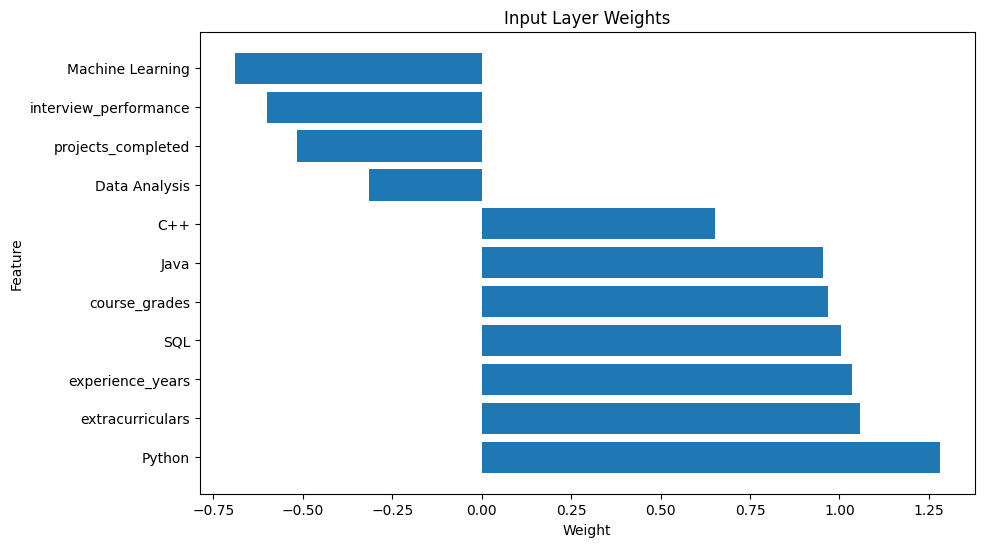

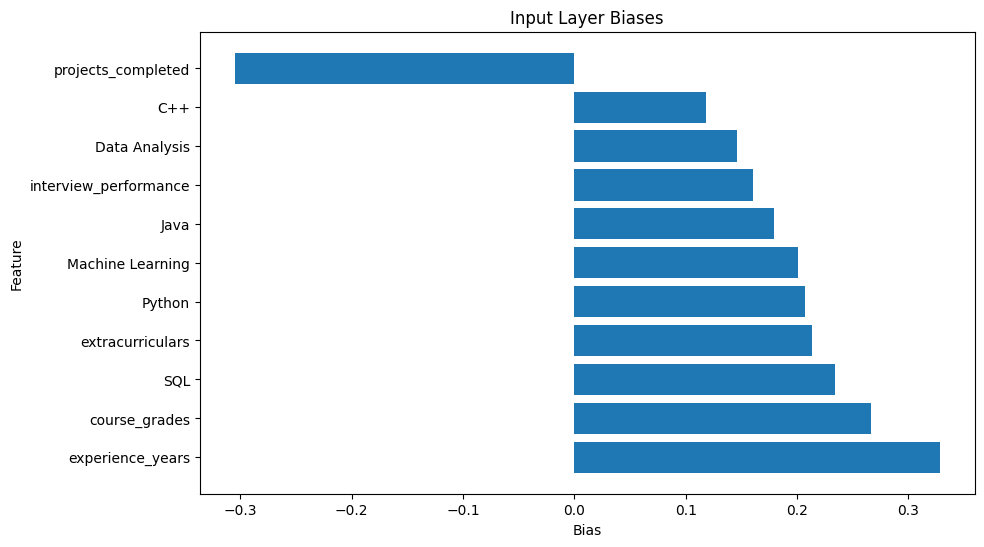

In [155]:
# Get the weights of the model
model_weights = model.get_weights()

# Get the input layer weights
input_layer_weights = model_weights[0]

# Get the feature names
feature_names = X.columns

# Create a dataframe with feature names and weights
feature_weights = pd.DataFrame(list(zip(feature_names, input_layer_weights.flatten())), columns=['feature', 'weight'])
feature_weights = feature_weights.sort_values(by='weight', ascending=False)

# Plot the weights
plt.figure(figsize=(10, 6))
plt.barh(feature_weights['feature'], feature_weights['weight'])
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Input Layer Weights')
plt.show()

# Get the biases of the input layer
input_layer_biases = model_weights[1]

# Create a dataframe with feature names and biases
feature_biases = pd.DataFrame(list(zip(feature_names, input_layer_biases)), columns=['feature', 'bias'])
feature_biases = feature_biases.sort_values(by='bias', ascending=False)

# Plot the biases
plt.figure(figsize=(10, 6))
plt.barh(feature_biases['feature'], feature_biases['bias'])
plt.xlabel('Bias')
plt.ylabel('Feature')
plt.title('Input Layer Biases')
plt.show()